GROUP 3 - PROJECT 1 - Exploring and identifying potential healthcare holes in Victoria

Research Question 3: Comparing patient wait time at hospitals in Victoria whilst analyzing trends in population growth.  from 2016 to 2021 (and projected 2036) based on data released by authorised/qualified government facilities.

Prepared by: Pedro Azpurua

Step 1: Import all the dependencies for the jupyter notebook program and add some setup settings

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
import scipy.stats as st
from pathlib import Path
from scipy.stats import ttest_ind

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

Importing and cleaning wait time data accross victorian hospitals. 

In [35]:
#Data set 1: wait tiem across reporting units

wait = Path("raw/3_hosp_wait_time.csv")
wait_raw_df = pd.read_csv(wait, encoding='cp1252')
wait_raw_df

,Reporting unit type,Reporting unit,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Hospital,Albury Wodonga Health [Wodonga Campus],91,101,118,105,113,109,111,125,134,142,146
1,Hospital,Angliss Hospital,178,186,176,168,178,169,174,180,182,190,213
2,Hospital,Austin Hospital [Heidelberg],228,220,213,196,180,192,189,194,205,227,279
3,Hospital,Bairnsdale Regional Health Service,129,137,133,141,138,131,133,123,134,164,207
4,Hospital,Ballarat Health Services [Base Hospital],131,147,160,166,174,187,178,193,195,213,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Local Hospital Network,West Gippsland Healthcare Group,0,0,0,0,0,0,0,178,177,182,208
66,Local Hospital Network,Western District Health Service (Vic),0,0,0,0,0,0,0,140,153,166,156
67,Local Hospital Network,Western Health (Vic),0,0,0,0,0,0,0,211,215,230,238
68,Local Hospital Network,Wimmera Health Care Group,0,0,0,0,0,0,0,159,152,149,164


In [36]:
#Data set just for vic

victoria_wait_df = wait_raw_df.loc[wait_raw_df["Reporting unit"]=="Victoria"]
victoria_wait_df

,Reporting unit type,Reporting unit,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
69,State,Victoria,182,182,176,174,176,177,183,190,194,202,223


In [37]:
#clearing out blanks and victoria average form the data set
filtered_df = wait_raw_df[wait_raw_df['2017'] != 0]
filtered_df= filtered_df[filtered_df["Reporting unit type"] != "State"]
filtered_df

,Reporting unit type,Reporting unit,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Hospital,Albury Wodonga Health [Wodonga Campus],91,101,118,105,113,109,111,125,134,142,146
1,Hospital,Angliss Hospital,178,186,176,168,178,169,174,180,182,190,213
2,Hospital,Austin Hospital [Heidelberg],228,220,213,196,180,192,189,194,205,227,279
3,Hospital,Bairnsdale Regional Health Service,129,137,133,141,138,131,133,123,134,164,207
4,Hospital,Ballarat Health Services [Base Hospital],131,147,160,166,174,187,178,193,195,213,260
6,Hospital,Box Hill Hospital,244,233,221,212,217,197,221,224,227,255,284
7,Hospital,Casey Hospital,178,183,160,147,155,166,194,204,201,188,223
8,Hospital,Central Gippsland Health Service [Sale],139,154,137,144,152,157,153,159,170,170,206
9,Hospital,Dandenong Hospital,220,225,182,172,175,179,202,221,240,218,244
10,Hospital,Echuca Regional Health,112,96,92,96,112,117,129,143,142,151,173


Hypothesis section Trial 1: Data includes all hospitals and reporitng units.

In [38]:
#HP TEst one testing for growth btw 2018 and 2019 in wait time 
var1 = filtered_df["2018"]
var2 = filtered_df["2019"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -0.5793142544719608
p-value:  0.5641365891395211


In [39]:
#HP TEst one testing for growth btw 2018 and 2020 in wait time 
var1 = filtered_df["2018"]
var2 = filtered_df["2020"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -1.5871951135889328
p-value:  0.11673253012976069


In [40]:
#HP TEst one testing for growth btw 2018 and 2021 in wait time 
var1 = filtered_df["2018"]
var2 = filtered_df["2021"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -3.648590469288305
p-value:  0.0004882074617688844


Filtering out Wait time data set to only include Victorian Hospitals


In [41]:
#Data set 2: Filetring out just for the hospitals, this was before hospitals started getting grouped into reporting units
filtered_df2 = wait_raw_df[wait_raw_df['2017'] != 0]
filtered_df2= filtered_df[filtered_df["Reporting unit type"] == "Hospital"]
filtered_df2

,Reporting unit type,Reporting unit,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Hospital,Albury Wodonga Health [Wodonga Campus],91,101,118,105,113,109,111,125,134,142,146
1,Hospital,Angliss Hospital,178,186,176,168,178,169,174,180,182,190,213
2,Hospital,Austin Hospital [Heidelberg],228,220,213,196,180,192,189,194,205,227,279
3,Hospital,Bairnsdale Regional Health Service,129,137,133,141,138,131,133,123,134,164,207
4,Hospital,Ballarat Health Services [Base Hospital],131,147,160,166,174,187,178,193,195,213,260
6,Hospital,Box Hill Hospital,244,233,221,212,217,197,221,224,227,255,284
7,Hospital,Casey Hospital,178,183,160,147,155,166,194,204,201,188,223
8,Hospital,Central Gippsland Health Service [Sale],139,154,137,144,152,157,153,159,170,170,206
9,Hospital,Dandenong Hospital,220,225,182,172,175,179,202,221,240,218,244
10,Hospital,Echuca Regional Health,112,96,92,96,112,117,129,143,142,151,173


Hypothesis section trial 2: Data only contains hopspital data and in my opinion, this is the one we should use

In [42]:
#HP1 DF2: Hypothesis test of increase in wait time across hospitals only between 2016 and 2019
var1 = filtered_df2["2016"]
var2 = filtered_df2["2019"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -2.1235026693227272
p-value:  0.037054959254816555


In [43]:
#HP2 DF2: Hypothesis test of increase in wait time across hospitals only between 2016 and 2020
var1 = filtered_df2["2016"]
var2 = filtered_df2["2020"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -3.0143354372974684
p-value:  0.00352605439780217


In [44]:
#Results Test 1
var1 = filtered_df2["2016"]
var2 = filtered_df2["2021"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -4.933441868247608
p-value:  4.829172627677075e-06


Importing cleaned data for graphing. All years and Wait time have been converted into two single variables

In [45]:

#bringing wait time data set for plotting where all the year and wait times are in the same data set
wait_plt = Path("raw/3_wait_for_plt.csv")
wait_plt
wait_plt_raw_df= pd.read_csv(wait_plt, encoding='cp1252')
wait_plt_raw_df


,Reporting unit type,Reporting unit,Year,Wait Time
0,Hospital,Albury Wodonga Health [Wodonga Campus],2018,125
1,Hospital,Angliss Hospital,2018,180
2,Hospital,Austin Hospital [Heidelberg],2018,194
3,Hospital,Bairnsdale Regional Health Service,2018,123
4,Hospital,Ballarat Health Services [Base Hospital],2018,193
...,...,...,...,...
555,Local Hospital Network,West Gippsland Healthcare Group,2014,0
556,Local Hospital Network,Western District Health Service (Vic),2014,0
557,Local Hospital Network,Western Health (Vic),2014,0
558,Local Hospital Network,Wimmera Health Care Group,2014,0


In [46]:
#For time series plotting incorporating years and wait itme into two single variables rtather than spliting as variables per year
filtered_df3 = wait_plt_raw_df[wait_plt_raw_df['Wait Time'] != 0]
filtered_df3= filtered_df3[filtered_df3["Reporting unit type"] == "Hospital"]
filtered_df3

,Reporting unit type,Reporting unit,Year,Wait Time
0,Hospital,Albury Wodonga Health [Wodonga Campus],2018,125
1,Hospital,Angliss Hospital,2018,180
2,Hospital,Austin Hospital [Heidelberg],2018,194
3,Hospital,Bairnsdale Regional Health Service,2018,123
4,Hospital,Ballarat Health Services [Base Hospital],2018,193
...,...,...,...,...
524,Hospital,West Gippsland Healthcare Group [Warragul],2014,153
525,Hospital,Western District Health Service [Hamilton],2014,124
526,Hospital,Western Hospital [Footscray],2014,239
527,Hospital,Williamstown Hospital,2014,89


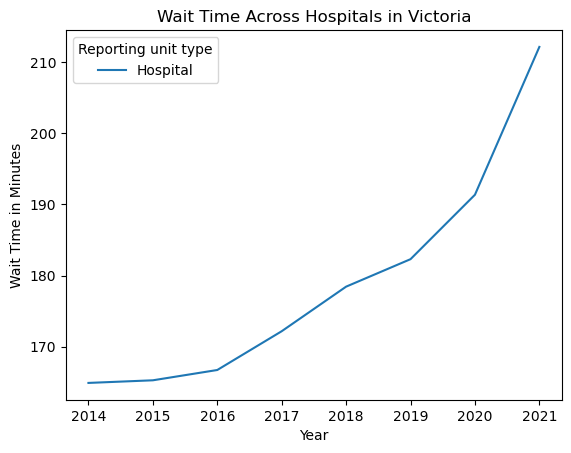

In [47]:
#Graph below shows the 
# assuming the 'filtered_df_3' DataFrame has columns named 'Year', 'reporting unit', and 'Wait times'
wait_pivot = pd.pivot_table(filtered_df3, values='Wait Time', index='Year', columns='Reporting unit type')  # create a new DataFrame with each hospital as a separate column
wait_pivot.plot(legend=True)  # plot the time series for each hospital
plt.xlabel('Year')  # add x-axis label
plt.ylabel('Wait Time in Minutes')  # add y-axis label
plt.title('Wait Time Across Hospitals in Victoria')  # add plot title
plt.show()  # display the plot

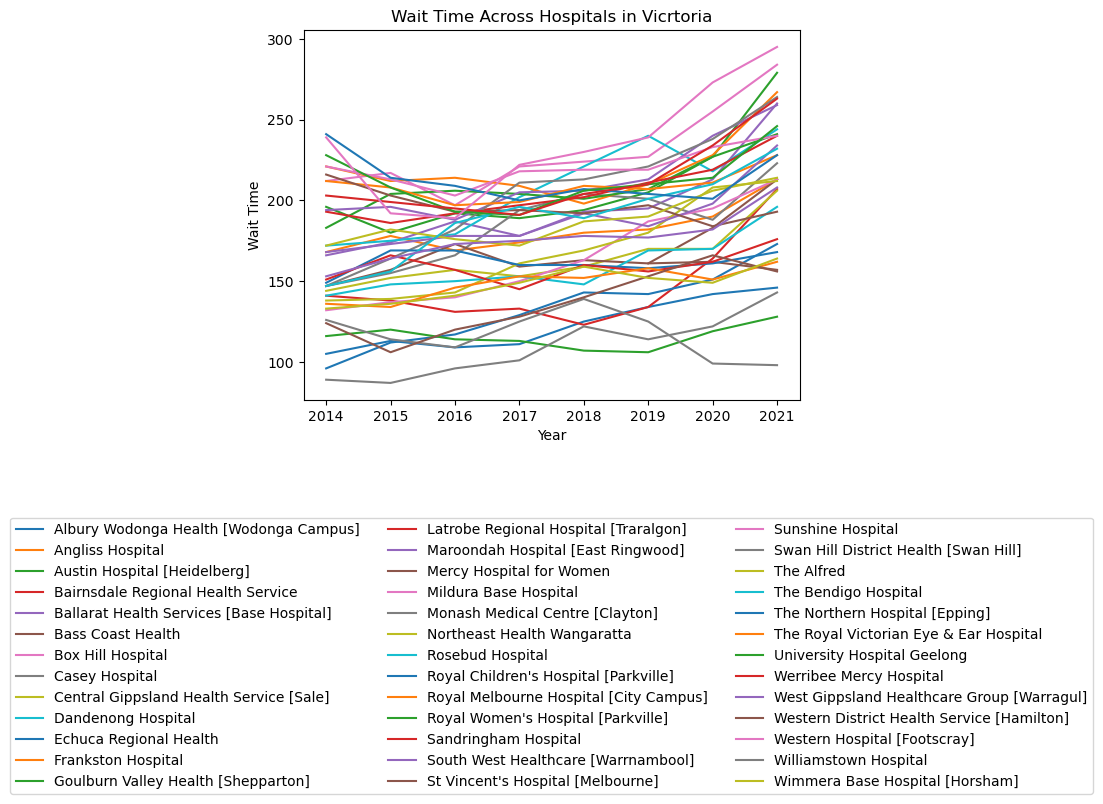

In [48]:
wait_pivot = pd.pivot_table(filtered_df3, values='Wait Time', index='Year', columns='Reporting unit')  # create a new DataFrame with each hospital as a separate column
wait_pivot.plot()  
plt.xlabel('Year')  
plt.ylabel('Wait Time') 
plt.title('Wait Time Across Hospitals in Vicrtoria')  # add plot title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)  # move the legend below the plot
plt.show()  # display the plot


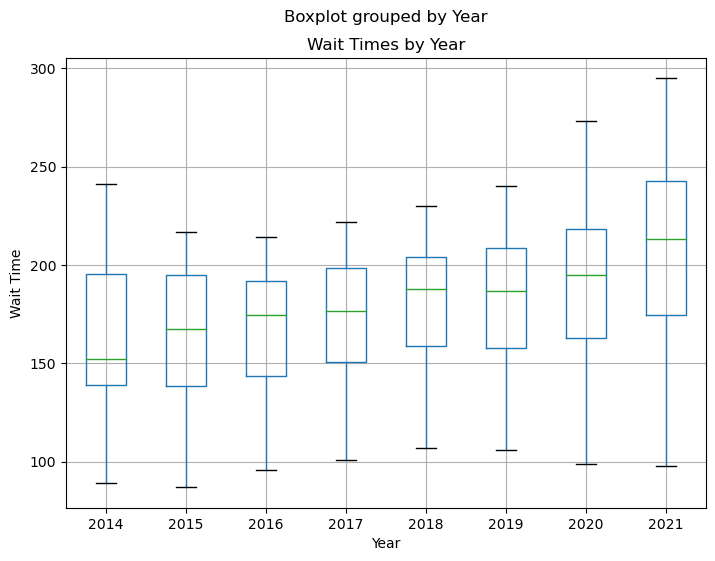

In [49]:
filtered_df3.boxplot(column='Wait Time', by='Year', figsize=(8,6))
plt.title('Wait Times by Year')
plt.xlabel('Year')
plt.ylabel('Wait Time')
plt.show()

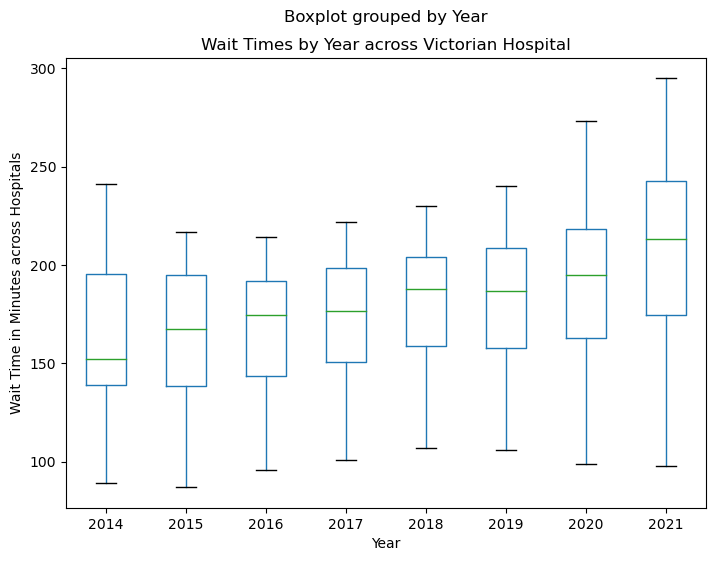

In [50]:
filtered_df3.boxplot(column='Wait Time', by='Year', figsize=(8,6), grid=False)
plt.title('Wait Times by Year across Victorian Hospital')
plt.xlabel('Year')
plt.ylabel('Wait Time in Minutes across Hospitals')
plt.show()

In [51]:
file = "raw/3_rebased_2021_erp.xlsx"
pop_df = pd.read_excel(file, decimal=',')
#Cleaning
del pop_df["Unnamed: 23"]
pop_df = pop_df.dropna(how='any')
pop_df

,LGA code,Local Government Area,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,Local Government Area.1,Change in pop - 16-21,% change
0,20110,Alpine,12709.0,12655.0,12581.0,12432.0,12372.0,12260.0,12227.0,12156.0,...,12429.0,12578.0,12679.0,12807.0,12884.0,13028.0,13156.0,Alpine,578.0,0.045953
1,20260,Ararat,11544.0,11566.0,11536.0,11510.0,11452.0,11422.0,11363.0,11344.0,...,11644.0,11745.0,11790.0,11792.0,11822.0,11896.0,11821.0,Ararat,76.0,0.006471
2,20570,Ballarat,82333.0,83168.0,84190.0,84775.0,85663.0,86647.0,87796.0,89531.0,...,101479.0,103500.0,105498.0,107518.0,109650.0,111476.0,113482.0,Ballarat,9982.0,0.096444
3,20660,Banyule,117967.0,117559.0,117313.0,116661.0,117149.0,117963.0,119362.0,120580.0,...,126088.0,127447.0,128601.0,129548.0,130478.0,130121.0,127376.0,Banyule,-71.0,-0.000557
4,20740,Bass Coast,25243.0,25809.0,26224.0,26476.0,26894.0,26941.0,27408.0,27981.0,...,32576.0,33464.0,34726.0,36041.0,37382.0,38869.0,40641.0,Bass Coast,7177.0,0.214469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,27260,Wyndham,86604.0,90333.0,95776.0,101789.0,108795.0,115161.0,123778.0,133063.0,...,213815.0,227008.0,241436.0,256758.0,272852.0,286796.0,296193.0,Wyndham,69185.0,0.304769
76,27350,Yarra,68522.0,69415.0,70115.0,70811.0,71719.0,72808.0,74289.0,75868.0,...,89923.0,92894.0,94465.0,95440.0,96459.0,96547.0,91543.0,Yarra,-1351.0,-0.014543
77,27450,Yarra Ranges,141674.0,142449.0,142928.0,142827.0,142928.0,143393.0,144485.0,145884.0,...,153391.0,155226.0,156621.0,157696.0,158585.0,158657.0,157419.0,Yarra Ranges,2193.0,0.014128
78,27630,Yarriambiack,8184.0,8095.0,7982.0,7847.0,7715.0,7609.0,7505.0,7438.0,...,6826.0,6743.0,6705.0,6693.0,6669.0,6633.0,6511.0,Yarriambiack,-232.0,-0.034406


In [52]:
#Convert all columns types to string
pop_df.columns = pop_df.columns.astype(str)
pop_df.columns

Index(['LGA code', 'Local Government Area', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Local Government Area.1', 'Change in pop - 16-21', '% change'],
      dtype='object')

In [53]:
pop_new_df = pop_df.loc[:,['Local Government Area','2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',"Change in pop - 16-21"]]
pop_new_df.head()

,Local Government Area,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Change in pop - 16-21
0,Alpine,12709.0,12655.0,12581.0,12432.0,12372.0,12260.0,12227.0,12156.0,12112.0,...,12283.0,12355.0,12429.0,12578.0,12679.0,12807.0,12884.0,13028.0,13156.0,578.0
1,Ararat,11544.0,11566.0,11536.0,11510.0,11452.0,11422.0,11363.0,11344.0,11332.0,...,11490.0,11560.0,11644.0,11745.0,11790.0,11792.0,11822.0,11896.0,11821.0,76.0
2,Ballarat,82333.0,83168.0,84190.0,84775.0,85663.0,86647.0,87796.0,89531.0,91390.0,...,98344.0,99914.0,101479.0,103500.0,105498.0,107518.0,109650.0,111476.0,113482.0,9982.0
3,Banyule,117967.0,117559.0,117313.0,116661.0,117149.0,117963.0,119362.0,120580.0,122248.0,...,124314.0,125107.0,126088.0,127447.0,128601.0,129548.0,130478.0,130121.0,127376.0,-71.0
4,Bass Coast,25243.0,25809.0,26224.0,26476.0,26894.0,26941.0,27408.0,27981.0,28561.0,...,31331.0,31917.0,32576.0,33464.0,34726.0,36041.0,37382.0,38869.0,40641.0,7177.0


In [54]:
#HP4 T1 with Shelly's data: Hypothesis test of increase in wait time across hospitals only between 2001 and 2021
var1 = pop_new_df["2001"]
var2 = pop_new_df["2021"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -2.0876090602764354
p-value:  0.03843793112867708


In [55]:
#HP4 T2 with Shelly's data: Hypothesis test of increase in wait time across hospitals only between 2001 and 2021
var1 = pop_new_df["2002"]
var2 = pop_new_df["2021"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -2.016600567507161
p-value:  0.04543108881133439


In [56]:
#HP4 T3 with Shelly's data: Hypothesis test of increase in wait time across hospitals only between 2003 and 2021
var1 = pop_new_df["2003"]
var2 = pop_new_df["2021"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -1.943687104709256
p-value:  0.05371006484270942


In [57]:
#Results Test 2
var1 = pop_new_df["2016"]
var2 = pop_new_df["2021"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -0.38968978529287657
p-value:  0.6972907268423381


In [58]:
#HP4 T3 with Shelly's data: Hypothesis test of increase in wait time across hospitals only between 2016 and 2019
var1 = pop_new_df["2016"]
var2 = pop_new_df["2018"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -0.2603824471081966
p-value:  0.7949078109018586


In [59]:
#Data set 5: projections

projections_path = Path("raw/3_Projections.csv")
projections_df = pd.read_csv(projections_path, encoding='cp1252')

projections_df

,Year,2016,2021,2026,2031,2036
0,Alpine (S),12578.000000,12928.648230,13126.661930,13321.00111,13506.972120
1,Ararat (RC),11746.428540,11910.793190,11927.596030,11897.34640,11865.072720
2,Ballarat (C),103500.321900,113713.758000,124628.069400,135437.81410,145926.852200
3,Banyule (C),127447.000000,133602.225900,139079.612400,144679.03750,150761.186700
4,Bass Coast (S),33464.853290,37659.056170,41212.013970,44810.26603,48144.923280
...,...,...,...,...,...,...
75,Wodonga (C),40100.000000,44165.094860,49173.757550,54107.88484,58900.927270
76,Wyndham (C),227007.955400,298150.046800,354542.770200,406651.38580,459216.186700
77,Yarra (C),92898.523270,104904.988700,115586.591400,125855.50150,136454.095800
78,Yarra Ranges (S),155227.434900,161497.188900,168480.597100,176032.24410,183821.252800


In [60]:
#HP on projections
var1 = projections_df["2016"]
var2 = projections_df["2021"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -0.6953501461658742
p-value:  0.48785731412266653


In [61]:
#HP on projections
var1 = projections_df["2021"]
var2 = projections_df["2026"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -0.5601994326924737
p-value:  0.5761368357511407


In [62]:
#HP on projections
var1 = projections_df["2016"]
var2 = projections_df["2031"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -1.7026929729492104
p-value:  0.09059198289750063


In [63]:
#Results Test 3
var1 = projections_df["2016"]
var2 = projections_df["2036"]
t_stat, p_val = ttest_ind(var1, var2)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  -2.09675936097621
p-value:  0.03760773080828961


In [64]:
victoria_wait_df.T

,69
Reporting unit type,State
Reporting unit,Victoria
2011,182
2012,182
2013,176
2014,174
2015,176
2016,177
2017,183
2018,190


In [65]:
wait_plt_raw_df

victoria_wait2_df = wait_raw_df.loc[wait_raw_df["Reporting unit type"]=="State"]
victoria_wait2_df.T

,69
Reporting unit type,State
Reporting unit,Victoria
2011,182
2012,182
2013,176
2014,174
2015,176
2016,177
2017,183
2018,190


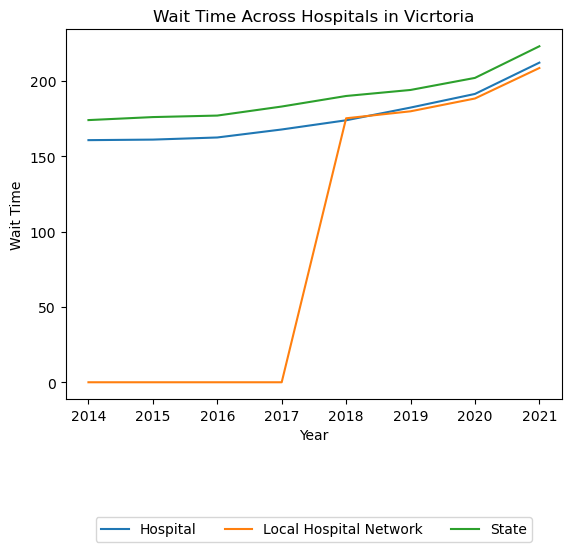

In [66]:
wait_pivot2 = pd.pivot_table(wait_plt_raw_df, values='Wait Time', index='Year', columns='Reporting unit type')  # create a new DataFrame with each hospital as a separate column
wait_pivot2.plot()  
plt.xlabel('Year')  
plt.ylabel('Wait Time') 
plt.title('Wait Time Across Hospitals in Vicrtoria')  # add plot title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)  # move the legend below the plot
plt.show()  # display the plot